In [23]:
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
library(factoextra) # clustering algorithms & visualization
library(dtwclust)
library(lubridate)
library("RColorBrewer")

In [ ]:
df <- read_csv(file.path('./datasets2/60_0.csv'))
pc <- tsclust(df, type = "partitional", k = 3L:7L, 
           distance = "dtw_basic", centroid = "pam", 
           seed = 3247L, trace = TRUE)
names(pc) <-paste0("k_", 3L:7L)
pc_cvi<-sapply(pc,cvi, type="internal")

In [3]:
df <- read_csv(file.path('./tmp/60_0.csv'))

Parsed with column specification:
cols(
  `0` = col_double(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double()
)


In [ ]:
help('paste0')

In [57]:
cvis <- list()

In [66]:
cvis[[1]] <- pc_cvi

In [70]:
cvis[[paste("hello", 1)]] <- pc_cvi

In [78]:
write.csv(pc_cvi, paste0('datasets2/','60_0','_cvi.csv'))

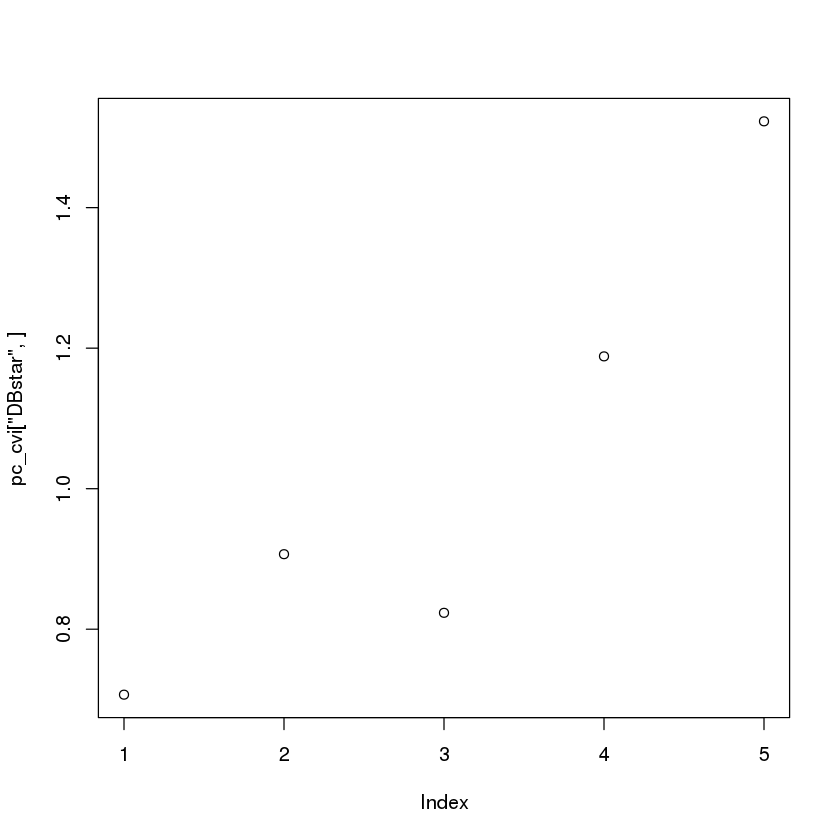

In [16]:
plot(pc_cvi['DBstar',])

In [ ]:
types<-c("partitional", "hierarchical", "tadpole","fuzzy")
dists<-c("dtw","dtw2","dtw_lb","lbk","lbi","sbd","gak","sdtw")
for (file in list.files('./datasets2')){
    print(file)
    for (dist in dists){
        df <- read_csv(file.path('./datasets2/',file))
        pc <- tsclust(df, type = "partitional", k = 3L:7L, 
                   distance = dist, centroid = "pam", 
                   seed = 3247L, trace = TRUE, args = tsclust_args(dist = list(window.size = 5L)))
        names(pc) <-paste0("k_", 3L:7L)
        pc_cvi<-sapply(pc,cvi, type="internal")
        print(pc_cvi)
        write.csv(pc_cvi, paste0('cvi/partitional/',dist,'/',file))
        df <- NULL
        pc <- NULL
        pc_cvi <-NULL
    }
}

[1] "120_0.25.csv"


Parsed with column specification:
cols(
  `0` = col_double(),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double()
)


In [31]:
k6 <- kmeans(df_raw, centers = 6, nstart = 25)

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 10307450)”Warning message:
“Quick-T


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



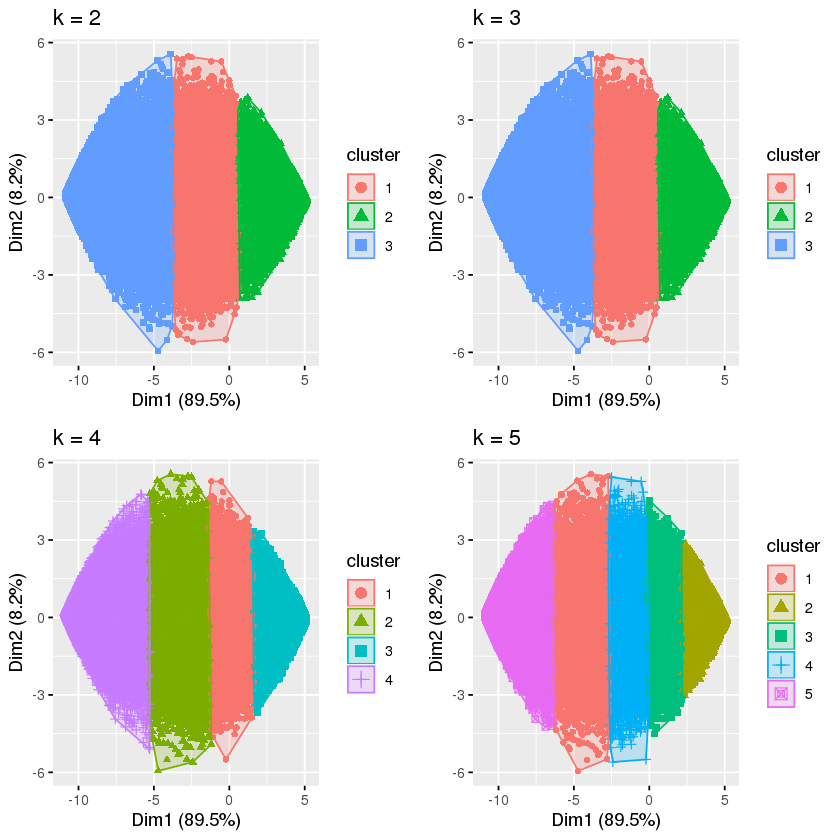

In [35]:
df=df_raw
k3 <- kmeans(df, centers = 3, nstart = 25)
k4 <- kmeans(df, centers = 4, nstart = 25)
k5 <- kmeans(df, centers = 5, nstart = 25)

# plots to compare
p1 <- fviz_cluster(k2, geom = "point", data = df) + ggtitle("k = 2")
p2 <- fviz_cluster(k3, geom = "point",  data = df) + ggtitle("k = 3")
p3 <- fviz_cluster(k4, geom = "point",  data = df) + ggtitle("k = 4")
p4 <- fviz_cluster(k5, geom = "point",  data = df) + ggtitle("k = 5")

library(gridExtra)
grid.arrange(p1, p2, p3, p4, nrow = 2)

## Determing optimal clusters

### Elbow method

In [ ]:
set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(df, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:15

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

### Average Silhouette Method

In [9]:
# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- kmeans(df, centers = k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(df))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:15

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

ERROR: Error: cannot allocate vector of size 158.3 Gb


## Using compare_clustering

In [5]:
# Fuzzy preprocessing: calculate autocorrelation up to 50th lag
acf_fun <- function(series, ...) {
    lapply(series, function(x) {
        as.numeric(acf(x, lag.max = 50, plot = FALSE)$acf)
    })
}

# Define overall configuration
cfgs <- compare_clusterings_configs(
    types = c("p", "h", "f", "t"),
    k = 19L:20L,
    controls = list(
        partitional = partitional_control(
            iter.max = 30L,
            nrep = 1L
        ),
        hierarchical = hierarchical_control(
            method = "all"
        ),
        fuzzy = fuzzy_control(
            # notice the vector
            fuzziness = c(2, 2.5),
            iter.max = 30L
        ),
        tadpole = tadpole_control(
            # notice the vectors
            dc = c(1.5, 2),
            window.size = 19L:20L
        )
    ),
    preprocs = pdc_configs(
        type = "preproc",
        # shared
        none = list(),
        zscore = list(center = c(FALSE)),
        # only for fuzzy
        fuzzy = list(
            acf_fun = list()
        ),
        # only for tadpole
        tadpole = list(
            reinterpolate = list(new.length = 205L)
        ),
        # specify which should consider the shared ones
        share.config = c("p", "h")
    ),
    distances = pdc_configs(
        type = "distance",
        sbd = list(),
        fuzzy = list(
            L2 = list()
        ),
        share.config = c("p", "h")
    ),
    centroids = pdc_configs(
        type = "centroid",
        partitional = list(
            pam = list()
        ),
        # special name 'default'
        hierarchical = list(
            default = list()
        ),
        fuzzy = list(
            fcmdd = list()
        ),
        tadpole = list(
            default = list(),
            shape_extraction = list(znorm = TRUE)
        )
    )
)

# Number of configurations is returned as attribute
num_configs <- sapply(cfgs, attr, which = "num.configs")
cat("\nTotal number of configurations without considering optimizations:",
    sum(num_configs),
    "\n\n")


# Define evaluation functions based on CVI: Variation of Information (only crisp partition)
# vi_evaluators <- cvi_evaluators("VI")
# score_fun <- vi_evaluators$score
# pick_fun <- vi_evaluators$pick


Total number of configurations without considering optimizations: 56 



### Clean gs visualization

In [54]:
library(tibbletime)
library(dplyr)


Attaching package: ‘tibbletime’

The following object is masked from ‘package:stats’:

    filter



In [57]:
case1 <- read.csv('../data/libre_clean/1Chloe AliceEtherington_glucose_5-8-2019.csv')

In [64]:
head(case1)

time                bg   No
1 2019-01-30 15:26:00   NA 1 
2 2019-01-30 16:26:00 13.5 1 
3 2019-01-30 16:26:00   NA 1 
4 2019-01-30 16:26:00   NA 1 
5 2019-01-30 16:28:00 13.9 1 
6 2019-01-30 16:36:00 14.4 1

In [63]:
case1$time <- as.POSIXct(case1$time)

In [71]:
for (file in list.files('../data/libre_clean/')){
    case <- read.csv(file.path('../data/libre_clean/',file))
    case$time <- as.POSIXct(case$time)
    ggplot(data=case) + geom_line(mapping = aes(x=time, y=bg)) + labs(title = file)  
}

In [125]:
file = '3JohnValentine_glucose_5-8-2019.csv'
case <- read.csv(file.path('../data/libre_clean/',file))
case$time <- as.POSIXct(case$time)

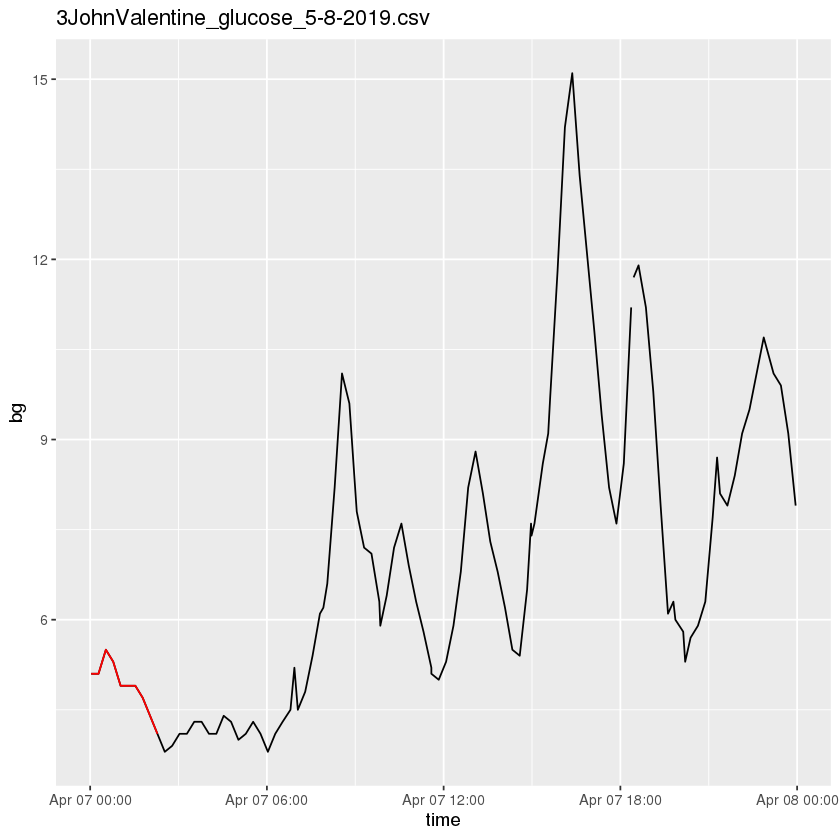

In [135]:
ggplot()+
geom_line(data=filter(case, time>'2019-04-07' & time<'2019-04-08'),mapping = aes(x=time, y=bg))+
geom_line(data=slice(filter(case, time>'2019-04-07' & time<'2019-04-08'), 1L:10L),mapping = aes(x=time, y=bg), color='red')+
labs(title = file)  

In [243]:
df_all <- read_csv(file.path('./datasets4/2_90_0.csv')) 

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  `0` = col_datetime(format = ""),
  `1` = col_double(),
  `2` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double()
)


In [380]:
times_all <- read_csv(file.path('./datasets4/times_all.csv')) 

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_double(),
  `0` = col_datetime(format = "")
)


In [244]:
df <- df_all %>% select(3:9)

In [238]:
# df <- read_csv(file.path('./datasets3/90_0.csv'))
pc <- tsclust(df, type = "partitional", k = 3L:10L, 
           distance = "dtw_basic", centroid = "pam", 
           seed = 3247L, trace = TRUE)
names(pc) <-paste0("k_", 3L:10L)


	Precomputing distance matrix...



Repetition 1 for k = 3


Iteration 1: Changes / Distsum = 4058 / 116745.9
Iteration 2: Changes / Distsum = 818 / 63650.8
Iteration 3: Changes / Distsum = 377 / 55803.6
Iteration 4: Changes / Distsum = 261 / 51768.6
Iteration 5: Changes / Distsum = 283 / 49537.4
Iteration 6: Changes / Distsum = 76 / 49189.3
Iteration 7: Changes / Distsum =  0 / 49189.3



Repetition 1 for k = 4


Iteration 1: Changes / Distsum = 4058 / 85167.4
Iteration 2: Changes / Distsum =  663 / 57450
Iteration 3: Changes / Distsum = 387 / 52738.2
Iteration 4: Changes / Distsum = 404 / 49991.5
Iteration 5: Changes / Distsum = 467 / 46303.5
Iteration 6: Changes / Distsum = 165 / 45643.2
Iteration 7: Changes / Distsum = 181 / 45157.1
Iteration 8: Changes / Distsum =  123 / 44855
Iteration 9: Changes / Distsum = 169 / 43911.5
Iteration 10: Changes / Distsum =  0 / 43911.5



Repetition 1 for k = 5


Iteration 1: Changes / Distsum = 4058 / 51970.4
Iteration 2: Changes / Distsum = 664 / 43191.6
Iteration 3: Changes / Distsum = 293 / 41143.6
Iteration 4: Changes / Distsum = 173 / 40602.3
Iteration 5: Changes / Distsum = 271 / 40171.6
Iteration 6: Changes / Distsum = 276 / 39395.7
Iteration 7: Changes / Distsum =  258 / 38267
Iteration 8: Changes / Distsum = 188 / 37213.7
Iteration 9: Changes / Distsum =  0 / 37213.7



Repetition 1 for k = 6


Iteration 1: Changes / Distsum = 4058 / 46204
Iteration 2: Changes / Distsum = 554 / 35758.6
Iteration 3: Changes / Distsum = 310 / 34028.5
Iteration 4: Changes / Distsum = 194 / 33193.1
Iteration 5: Changes / Distsum = 89 / 32942.6
Iteration 6: Changes / Distsum =  0 / 32942.6



Repetition 1 for k = 7


Iteration 1: Changes / Distsum = 4058 / 40078.2
Iteration 2: Changes / Distsum = 495 / 34439.1
Iteration 3: Changes / Distsum = 403 / 32915.7
Iteration 4: Changes / Distsum = 179 / 32332.4
Iteration 5: Changes / Distsum = 234 / 31906.9
Iteration 6: Changes / Distsum = 151 / 31683.5
Iteration 7: Changes / Distsum =  0 / 31683.5



Repetition 1 for k = 8


Iteration 1: Changes / Distsum = 4058 / 40033.3
Iteration 2: Changes / Distsum = 494 / 31734.5
Iteration 3: Changes / Distsum = 34 / 31685.7
Iteration 4: Changes / Distsum =  0 / 31685.7



Repetition 1 for k = 9


Iteration 1: Changes / Distsum = 4058 / 48648.3
Iteration 2: Changes / Distsum = 917 / 31130.9
Iteration 3: Changes / Distsum = 537 / 28918.1
Iteration 4: Changes / Distsum = 254 / 28297.6
Iteration 5: Changes / Distsum = 78 / 28166.2
Iteration 6: Changes / Distsum = 84 / 28102.7
Iteration 7: Changes / Distsum = 74 / 27953.4
Iteration 8: Changes / Distsum =  0 / 27953.4



Repetition 1 for k = 10


Iteration 1: Changes / Distsum = 4058 / 39996.2
Iteration 2: Changes / Distsum = 791 / 28284.8
Iteration 3: Changes / Distsum = 407 / 27111.2
Iteration 4: Changes / Distsum = 201 / 26349.6
Iteration 5: Changes / Distsum = 133 / 26174.9
Iteration 6: Changes / Distsum =  0 / 26174.9

	Elapsed time is 2.566 seconds.



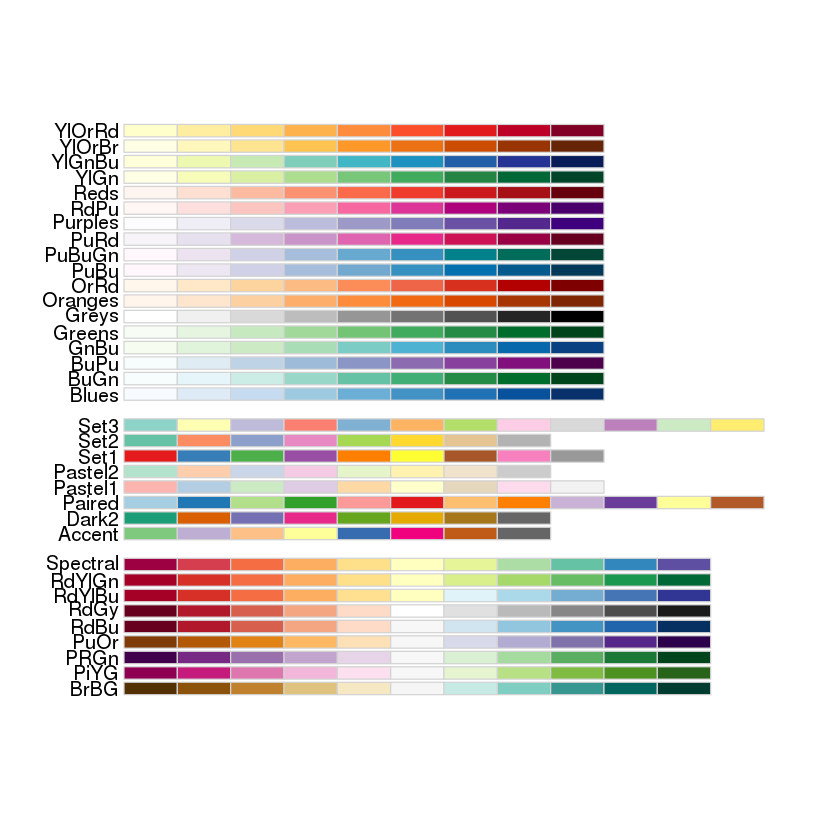

In [203]:
display.brewer.all()

In [379]:
df_all

X1   0                   1    2    3    4    5    6    7   
1     0   2018-02-14 18:48:00  6.8  6.8  6.8  6.9  7.0  7.3  8.6
2     1   2018-02-14 19:20:00  7.7  6.9  6.1  5.7  5.5  5.2  5.2
3     2   2018-02-14 20:05:00  5.7  5.5  5.2  5.2  5.2  5.1  4.8
4     3   2018-02-14 20:48:00 10.6 10.0  9.8  9.4  8.7  7.8  5.7
5     4   2018-02-15 01:07:00  4.8  5.0  5.4  5.9  7.3  9.1  9.9
6     5   2018-02-15 06:39:00 16.0 15.9 15.6 15.1 14.4 13.5 12.7
7     6   2018-02-15 07:39:00 14.4 13.5 12.7 12.7 12.5 11.8 11.8
8     7   2018-02-15 09:09:00 11.8 11.7 10.7 10.1 10.3 11.7 11.5
9     8   2018-02-15 12:55:00  6.6  8.3  8.5  8.3  7.9  7.7  7.9
10    9   2018-02-15 16:56:00  9.5  8.7  7.1  4.7  3.3  3.3  4.7
11   10   2018-02-15 19:27:00  4.5  4.2  4.3  4.7  5.4  7.4  9.9
12   11   2018-02-15 20:27:00  5.4  7.4  9.9 11.2 12.0 13.2 14.1
13   12   2018-02-16 00:15:00 15.8 15.9 16.3 16.2 15.8 15.9 15.9
14   13   2018-02-16 01:45:00 15.9 15.7 15.6 15.5 15.3 15.1 14.7
15   14   2018-02-16 03:15:00 14.7 14.5 14.7 15.1 14.9 14.5 14.5
16   15   2018-02-16 04:45:00 14.5 14.7 14.6 14.6 14.6 14.3 14.1
17   16   2018-02-16 06:15:00 14.1 13.8 13.7 13.9 14.2 14.7 14.4
18   17   2018-02-16 10:33:00  7.8  6.5  5.8  5.7  5.7  5.2  4.7
19   18   2018-02-16 12:03:00  4.7  4.7  5.2  6.4  7.4  7.9  8.4
20   19   2018-02-16 14:49:00 10.1 10.4 11.6 10.8 10.7 10.6 10.6
21   20   2018-02-16 16:19:00 10.6 10.3  9.8  9.9 10.8 11.5 11.5
22   21   2018-02-16 17:49:00 11.5 10.7  9.6  8.7  8.2  7.7  7.4
23   22   2018-02-16 19:19:00  7.4  7.2  6.9  6.5  6.7  8.1  9.9
24   23   2018-02-16 20:34:00  8.1  9.9 11.2 12.1 12.4 12.4 12.6
25   24   2018-02-16 23:07:00  9.8  9.1  8.5  7.9  7.4  6.9  6.3
26   25   2018-02-17 00:37:00  6.3  6.0  5.8  5.6  5.4  5.2  5.1
27   26   2018-02-17 02:07:00  5.1  4.9  5.1  5.3  5.3  5.4  5.6
28   27   2018-02-17 05:08:00  6.2  6.4  6.6  6.6  6.8  6.8  6.7
29   28   2018-02-17 06:23:00  6.8  6.7  6.8  7.1  7.3  7.4  7.7
30   29   2018-02-17 07:53:00  7.7  8.2  8.4  8.7  9.1  9.4 10.3
...  ...  ...                 ...  ...  ...  ...  ...  ...  ... 
4029 4028 2019-08-02 13:54:00  4.9  6.0  7.0  7.3  8.6 10.7 12.2
4030 4029 2019-08-02 15:24:00 12.2 12.7 13.1 13.6 14.4 14.0 13.3
4031 4030 2019-08-02 20:12:00  5.4  4.4  3.6  3.7  6.4  7.4  7.3
4032 4031 2019-08-02 21:42:00  7.3  8.2  9.7 10.9 11.3 11.5 11.9
4033 4032 2019-08-03 00:14:00 10.7  9.7  8.6  8.2  9.1 10.1  9.4
4034 4033 2019-08-03 01:29:00 10.1  9.4  8.3  7.9  7.6  7.7  8.4
4035 4034 2019-08-03 02:59:00  8.4  8.9  8.7  8.8  8.9  8.4  8.7
4036 4035 2019-08-03 06:00:00  9.7  9.3  9.3  9.4  8.9  8.1  8.0
4037 4036 2019-08-03 08:31:00  9.1  8.4  9.8 10.3  9.4  9.4  9.6
4038 4037 2019-08-03 11:32:00  5.9  7.4  9.4 11.7 13.7 14.4 14.2
4039 4038 2019-08-03 16:21:00  4.3  3.9  4.9  6.8  7.3  5.7  4.1
4040 4039 2019-08-03 17:21:00  7.3  5.7  4.1  3.9  5.1  4.8  3.6
4041 4040 2019-08-03 18:51:00  3.6  3.3  4.4  6.6  9.1 11.1 12.9
4042 4041 2019-08-03 20:06:00 11.1 12.9 14.9 16.1 17.2 17.8 16.9
4043 4042 2019-08-03 22:37:00 16.4 17.7 17.2 16.1 15.9 14.4 11.3
4044 4043 2019-08-04 01:24:00  7.4  6.9  6.6  6.0  5.8  5.9  6.1
4045 4044 2019-08-04 02:54:00  6.1  6.3  6.3  6.2  6.3  6.6  7.0
4046 4045 2019-08-04 04:24:00  7.0  6.9  6.6  6.3  6.1  6.2  6.8
4047 4046 2019-08-04 08:42:00 10.4 10.9 11.1 11.1 11.5 11.2 10.1
4048 4047 2019-08-04 09:57:00 11.2 10.1  9.4  8.8  6.9  5.1  4.1
4049 4048 2019-08-04 12:13:00  4.8  6.7  7.2  6.7  5.9  5.9  6.4
4050 4049 2019-08-04 13:43:00  6.4  6.7  6.6  6.5  6.8  6.5  5.4
4051 4050 2019-08-04 20:16:00  4.3  4.1  3.8  3.6  4.9  8.3 10.6
4052 4051 2019-08-05 02:06:00 11.5 11.1 11.1 11.8 12.7 12.3 11.4
4053 4052 2019-08-05 03:36:00 11.4 11.7 12.9 13.9 13.8 13.2 12.8
4054 4053 2019-08-05 05:06:00 12.8 13.2 13.5 13.6 14.6 14.9 14.8
4055 4054 2019-08-05 06:36:00 14.8 15.0 15.1 15.3 15.4 14.7 13.9
4056 4055 2019-08-05 08:06:00 13.9 13.7 14.2 14.9 15.3 14.3 13.4
4057 4056 2019-08-05 13:38:00 10.9 13.1 14.4 14.5 14.5 14.6 14.9
4058 4057 2019-08-05 15:08:00 14.9 15.1 

In [384]:
df_clust <-
df_all %>%
mutate(k_3=pc$k_3@cluster, k_4=pc$k_4@cluster, k_5=pc$k_5@cluster, k_6=pc$k_6@cluster, k_7=pc$k_7@cluster) %>%
gather('1','2','3','4','5','6','7', key='sub_index', value='bg') %>%
mutate(time_all=times_all$'0')
# pc$k_3@cluster

In [256]:
head(df_all)

X1 0                   1    2    3    4    5    6    7   
1 0  2018-02-14 18:48:00  6.8  6.8  6.8  6.9  7.0  7.3  8.6
2 1  2018-02-14 19:20:00  7.7  6.9  6.1  5.7  5.5  5.2  5.2
3 2  2018-02-14 20:05:00  5.7  5.5  5.2  5.2  5.2  5.1  4.8
4 3  2018-02-14 20:48:00 10.6 10.0  9.8  9.4  8.7  7.8  5.7
5 4  2018-02-15 01:07:00  4.8  5.0  5.4  5.9  7.3  9.1  9.9
6 5  2018-02-15 06:39:00 16.0 15.9 15.6 15.1 14.4 13.5 12.7

In [295]:
2 %% 7

[1] 2

In [263]:
df_clust$'0' <- as.POSIXct(df_clust$'0')
df_clust %>% filter('0' > '2018-02-14' & '0' <'2018-02-015' )

X1 0 k_3 k_4 k_5 k_6 k_7 sub_index bg

In [282]:
time_list <- df_clust$time

In [ ]:
write.csv(...)

In [311]:
time_list_all <- list()
time_list_all <- list(time_list_all, time_list[1]) 

In [345]:
a<-time_list[1]

In [367]:
time_list_all[[1]]<-time_list[[1]]

In [366]:
time_list_all[[1]]

[1] 1518634080

In [368]:
time_list_all[[1]]+minutes(15)

[1] "2018-02-14 19:03:00 UTC"

In [372]:
time_list_all <- list()
L<-length(time_list)*7
for (i in 1:L){
    if(i%%7==1){
        if(i==1){
          time_list_all[[i]] <- time_list[[1]]
        }else{
          time_list_all[[i]] <- time_list[[i%/%7]]  
        } 
        print(time_list_all[[1]])
        for (j in (i+1):(i+6)){
            print(j)
            time_list_all[[j]] = time_list_all[[j-1]]+ minutes(15)
        }
    }
}

[1] "2018-02-14 18:48:00 UTC"
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] "2018-02-14 18:48:00 UTC"
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] "2018-02-14 18:48:00 UTC"
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] "2018-02-14 18:48:00 UTC"
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] "2018-02-14 18:48:00 UTC"
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] "2018-02-14 18:48:00 UTC"
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] "2018-02-14 18:48:00 UTC"
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] "2018-02-14 18:48:00 UTC"
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] "2018-02-14 18:48:00 UTC"
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] "2018-02-14 18:48:00 UTC"
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] "2018-02-14 18:48:00 UTC"
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] "2018-02-14 18:48:00 UTC"
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] "2018-02-14 18:48:00 UTC"
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] "2018-02-14 18:48:00 UTC"
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98

In [385]:
df_clust

X1   0                   k_3 k_4 k_5 k_6 k_7 sub_index bg  
1      0   2018-02-14 18:48:00 1   2   3   4   4   1          6.8
2      1   2018-02-14 19:20:00 2   2   3   4   5   1          7.7
3      2   2018-02-14 20:05:00 2   1   1   2   5   1          5.7
4      3   2018-02-14 20:48:00 1   4   2   3   1   1         10.6
5      4   2018-02-15 01:07:00 2   2   3   2   4   1          4.8
6      5   2018-02-15 06:39:00 3   3   5   1   7   1         16.0
7      6   2018-02-15 07:39:00 3   3   5   1   3   1         14.4
8      7   2018-02-15 09:09:00 1   4   4   1   3   1         11.8
9      8   2018-02-15 12:55:00 1   2   2   3   4   1          6.6
10     9   2018-02-15 16:56:00 2   1   1   2   5   1          9.5
11    10   2018-02-15 19:27:00 2   1   1   2   6   1          4.5
12    11   2018-02-15 20:27:00 1   4   4   6   2   1          5.4
13    12   2018-02-16 00:15:00 3   3   5   5   7   1         15.8
14    13   2018-02-16 01:45:00 3   3   5   5   7   1         15.9
15    14   2018-02-16 03:15:00 3   3   5   5   7   1         14.7
16    15   2018-02-16 04:45:00 3   3   5   5   7   1         14.5
17    16   2018-02-16 06:15:00 3   3   5   5   7   1         14.1
18    17   2018-02-16 10:33:00 2   1   1   4   5   1          7.8
19    18   2018-02-16 12:03:00 2   2   3   2   4   1          4.7
20    19   2018-02-16 14:49:00 1   4   4   6   2   1         10.1
21    20   2018-02-16 16:19:00 1   4   4   6   2   1         10.6
22    21   2018-02-16 17:49:00 1   4   2   3   3   1         11.5
23    22   2018-02-16 19:19:00 1   2   3   4   4   1          7.4
24    23   2018-02-16 20:34:00 1   4   4   6   2   1          8.1
25    24   2018-02-16 23:07:00 1   2   2   3   1   1          9.8
26    25   2018-02-17 00:37:00 2   2   3   4   5   1          6.3
27    26   2018-02-17 02:07:00 2   1   1   2   5   1          5.1
28    27   2018-02-17 05:08:00 2   2   3   4   4   1          6.2
29    28   2018-02-17 06:23:00 1   2   3   4   4   1          6.8
30    29   2018-02-17 07:53:00 1   4   4   6   1   1          7.7
...   ...  ...                 ... ... ... ... ... ...       ... 
28377 4028 2019-08-02 13:54:00 1   2   3   6   4   7         12.2
28378 4029 2019-08-02 15:24:00 3   3   5   1   2   7         13.3
28379 4030 2019-08-02 20:12:00 2   1   3   2   6   7          7.3
28380 4031 2019-08-02 21:42:00 1   4   4   6   2   7         11.9
28381 4032 2019-08-03 00:14:00 1   4   2   6   1   7          9.4
28382 4033 2019-08-03 01:29:00 1   4   2   3   1   7          8.4
28383 4034 2019-08-03 02:59:00 1   4   2   3   1   7          8.7
28384 4035 2019-08-03 06:00:00 1   4   2   3   1   7          8.0
28385 4036 2019-08-03 08:31:00 1   4   2   6   1   7          9.6
28386 4037 2019-08-03 11:32:00 3   3   4   6   2   7         14.2
28387 4038 2019-08-03 16:21:00 2   1   1   2   6   7          4.1
28388 4039 2019-08-03 17:21:00 2   1   1   2   5   7          3.6
28389 4040 2019-08-03 18:51:00 2   2   4   6   6   7         12.9
28390 4041 2019-08-03 20:06:00 3   3   5   5   7   7         16.9
28391 4042 2019-08-03 22:37:00 3   3   5   5   7   7         11.3
28392 4043 2019-08-04 01:24:00 2   2   3   4   5   7          6.1
28393 4044 2019-08-04 02:54:00 2   2   3   4   4   7          7.0
28394 4045 2019-08-04 04:24:00 2   2   3   4   4   7          6.8
28395 4046 2019-08-04 08:42:00 1   4   4   6   2   7         10.1
28396 4047 2019-08-04 09:57:00 2   4   2   3   1   7          4.1
28397 4048 2019-08-04 12:13:00 2   2   3   4   4   7          6.4
28398 4049 2019-08-04 13:43:00 2   2   3   4   5   7          5.4
28399 4050 2019-08-04 20:16:00 2   1   1   2   6   7         10.6
28400 4051 2019-08-05 02:06:00 3   3   4   1   2   7         11.4
28401 4052 2019-08-05 03:36:00 3   3   4   1   2   7         12.8
28402 4053 2019-08-05 05:06:00 3   3   5   1   7   7         14.8
28403 4054 2019-08-05 06:36:00 3   3   5   5   7   7         13.9
28404 4055 2019-08-05 08:06:00 3   3   5   1   7   7         13.4
28405 4056 2019-08-05 13:38:00 3   3   5   5  

In [286]:
time_list[1] + minutes(15)

[1] "2018-02-14 19:03:00 UTC"

In [273]:
names(df_clust) <- c('X1','time','k_3','k_4','k_5','k_6','k_7','sub_index','bg')

In [277]:
# filter(df_clust, time>'2018-02-14' & time < '2018-02-15')
filter(df_clust, time == '2018-02-14 18:48:00')

X1 time                k_3 k_4 k_5 k_6 k_7 sub_index bg 
1 0  2018-02-14 18:48:00 1   2   3   4   4   1         6.8
2 0  2018-02-14 18:48:00 1   2   3   4   4   2         6.8
3 0  2018-02-14 18:48:00 1   2   3   4   4   3         6.8
4 0  2018-02-14 18:48:00 1   2   3   4   4   4         6.9
5 0  2018-02-14 18:48:00 1   2   3   4   4   5         7.0
6 0  2018-02-14 18:48:00 1   2   3   4   4   6         7.3
7 0  2018-02-14 18:48:00 1   2   3   4   4   7         8.6

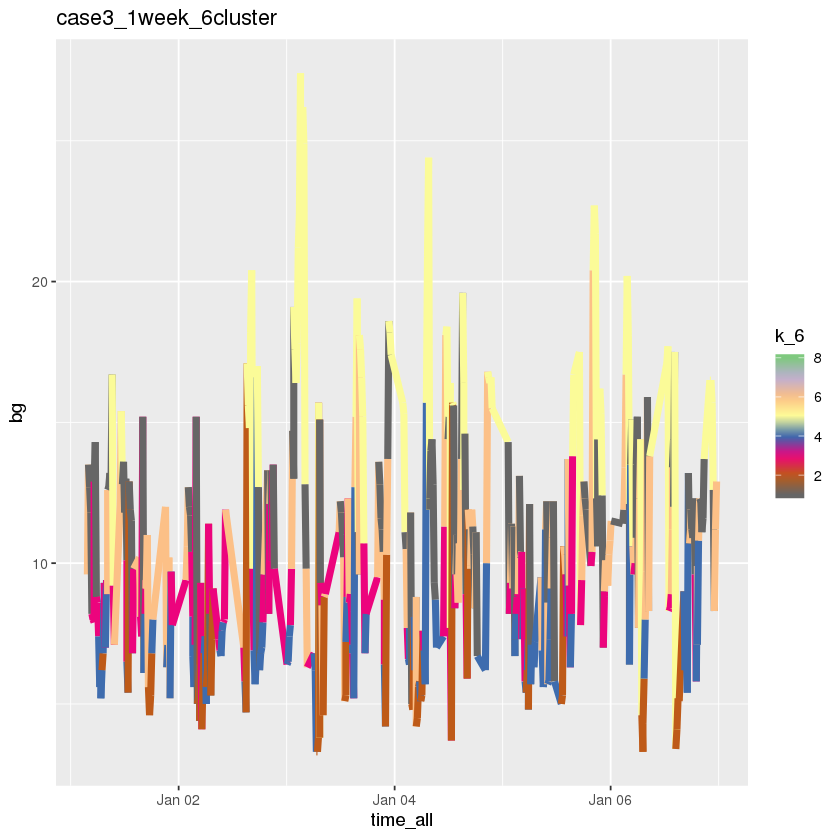

In [398]:
myPalette <- colorRampPalette(rev(brewer.pal(8, "Accent")))
sc <- scale_colour_gradientn(colours = myPalette(100), limits=c(1, 8))

ggplot()+
geom_line(data=filter(df_clust, time_all > '2019-01-01' & time_all<'2019-01-07'),mapping = aes(x=time_all, y=bg, color = k_6), size=2)+
# geom_line(data=slice(filter(case, time>'2019-04-07' & time<'2019-04-08'), 1L:10L),mapping = aes(x=time, y=bg), color='red')+
# scale_fill_brewer(palette="Dark2")+
# scale_color_manual(values = brewer.pal(n = 4, name = "RdBu"))+
sc+
labs(title = 'case3_1week_6cluster')  

ggsave('datasets4/60_cluster_1week.png', width = 20, height = 10,limitsize = FALSE)

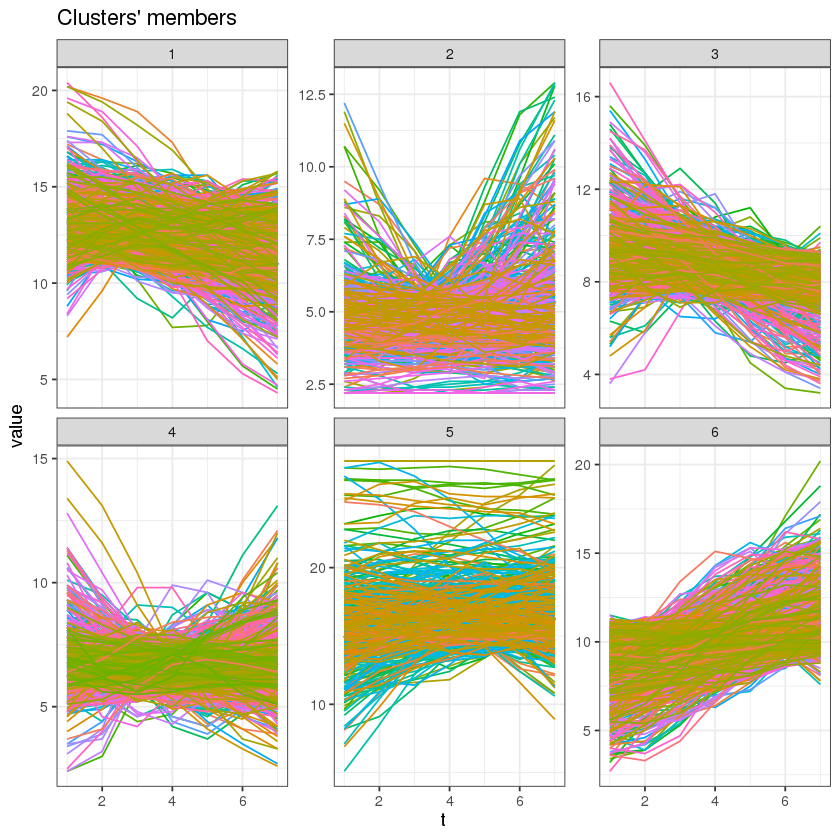

In [359]:
plot(pc$k_6)

In [153]:
df_clust

k_3 k_4 k_5 sub_index bg   time               
1     1   3   1   0          6.8 2018-01-11 22:17:00
2     1   3   5   0          7.7 2018-01-11 22:17:00
3     3   1   4   0          8.6 2018-01-12 07:47:00
4     1   3   5   0          5.3 2018-01-12 08:58:00
5     3   3   2   0          5.0 2018-01-12 08:58:00
6     2   1   2   0         12.5 2018-01-12 14:14:00
7     1   3   5   0          3.7 2018-01-12 16:37:00
8     2   4   3   0         15.8 2018-01-12 17:49:00
9     2   2   3   0         14.7 2018-01-12 17:49:00
10    2   2   3   0         14.6 2018-01-12 20:58:00
11    2   2   3   0         14.2 2018-01-12 22:26:00
12    1   3   5   0          5.7 2018-01-13 08:00:00
13    3   1   2   0         11.6 2018-01-13 10:11:00
14    3   1   4   0         10.8 2018-01-13 15:00:00
15    3   3   2   0          7.4 2018-01-13 15:00:00
16    1   3   5   0          6.3 2018-01-13 16:15:00
17    1   3   5   0          5.1 2018-01-13 17:52:00
18    1   3   1   0          6.8 2018-01-14 08:20:00
19    1   3   5   0          5.4 2018-01-14 10:09:00
20    1   3   5   0          4.2 2018-01-14 10:09:00
21    2   2   3   0         13.6 2018-01-14 12:57:00
22    2   2   3   0         13.0 2018-01-14 12:57:00
23    2   4   3   0         16.7 2018-01-14 16:48:00
24    2   4   3   0         16.6 2018-01-14 18:40:00
25    3   3   2   0          6.1 2018-01-14 21:02:00
26    2   1   3   0         12.9 2018-01-14 21:02:00
27    3   1   4   0         10.9 2018-01-14 22:58:00
28    1   3   2   0          4.1 2018-01-15 07:46:00
29    2   1   2   0         10.2 2018-01-15 13:07:00
30    2   2   3   0         12.4 2018-01-15 17:47:00
...   ... ... ... ...       ...  ...                
23443 3   3   2   8         10.4 2019-02-09 09:11:00
23444 3   1   4   8          9.7 2019-02-09 09:26:00
23445 1   3   5   8          2.2 2019-02-09 09:34:00
23446 1   3   5   8          3.1 2019-02-09 09:34:00
23447 1   3   5   8          5.8 2019-02-09 09:41:00
23448 1   3   1   8          5.4 2019-02-09 09:56:00
23449 1   3   5   8          3.4 2019-02-09 10:09:00
23450 1   3   5   8          5.7 2019-02-09 10:11:00
23451 3   3   1   8          9.7 2019-02-09 10:26:00
23452 2   2   2   8         12.7 2019-02-09 10:42:00
23453 1   3   5   8          2.2 2019-02-09 10:55:00
23454 1   3   5   8          4.4 2019-02-09 10:57:00
23455 2   2   2   8         16.0 2019-02-09 11:12:00
23456 3   3   2   8         13.1 2019-02-09 11:27:00
23457 3   3   2   8         11.3 2019-02-09 11:42:00
23458 3   1   4   8          7.9 2019-02-09 11:57:00
23459 3   3   4   8          8.9 2019-02-09 12:12:00
23460 1   3   5   8          3.6 2019-02-09 12:27:00
23461 2   3   2   8         16.1 2019-02-09 12:42:00
23462 1   3   1   8          5.8 2019-02-09 12:57:00
23463 1   3   1   8          7.0 2019-02-09 13:12:00
23464 1   3   1   8          7.0 2019-02-09 13:27:00
23465 1   3   5   8          6.4 2019-02-09 13:42:00
23466 1   3   1   8          5.4 2019-02-09 13:57:00
23467 1   3   2   8         11.8 2019-02-09 14:12:00
23468 2   1   2   8         11.4 2019-02-09 14:27:00
23469 2   2   2   8         13.5 2019-02-09 14:42:00
23470 2   2   3   8         15.4 2019-02-09 14:57:00
23471 2   2   3   8         13.4 2019-02-09 15:00:00
23472 2   2   3   8         14.9 2019-02-09 15:00:00